C:\Users\krk33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


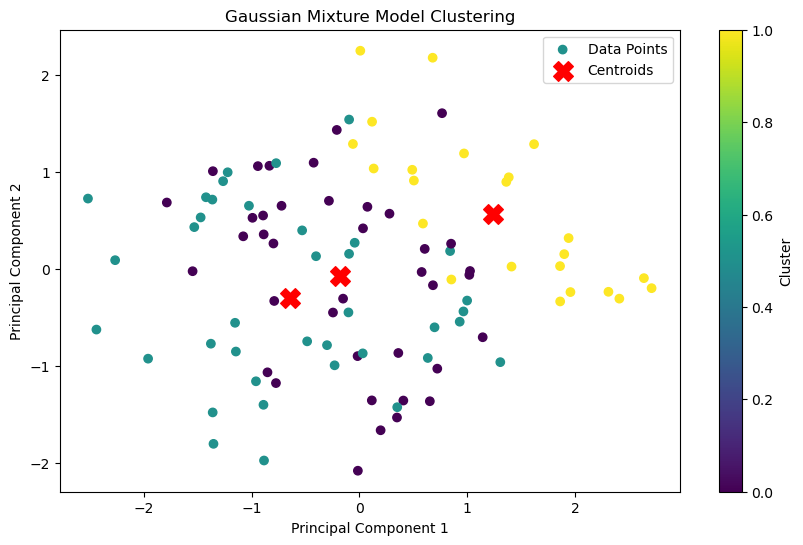

Cluster Centers (means):
[[-0.44595584  0.61992018 -0.14990536]
 [ 1.08091912  0.00878754  0.02312892]
 [-0.77646981 -1.10538879  0.23079274]]

Cluster Analysis (Mean of each feature per cluster):
               Age         Income  Spending Score
Cluster                                          
0        35.743590  105993.974359       48.666667
1        56.157895   81901.947368       53.157895
2        31.826087   39789.739130       58.608696


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

OMP_NUM_THREADS=1
# Step 1: Load the dataset
data = pd.read_csv('synthetic_dataset.csv')

# Select the features for clustering (you can modify this to use relevant features)
features = ['Age', 'Income', 'Spending Score']  # Modify as needed
X = data[features].values

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply the Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Using 3 clusters
gmm.fit(X_scaled)

# Step 4: Predict clusters
clusters = gmm.predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 5: Visualize the clusters using PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label='Data Points')

# Mark the centroids (means of each Gaussian component)
centroids = pca.transform(gmm.means_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Step 6: Print the cluster centers and some other information
print("Cluster Centers (means):")
print(gmm.means_)

print("\nCluster Analysis (Mean of each feature per cluster):")
print(data.groupby('Cluster')[features].mean())